# Install kagglehub to download the dataset

In [ ]:
!pip install kagglehub

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("romanfonel/precious-metals-history-since-2000-with-news")

print("Path to dataset files:", path)

d:\Data analysis project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\itshu\.cache\kagglehub\datasets\romanfonel\precious-metals-history-since-2000-with-news\versions\2


# Install Required Libraries 📦

In this step, we install the main libraries we need for data analysis and visualization:

- **pandas**: for data manipulation and analysis
- **numpy**: for numerical operations
- **matplotlib**: for creating basic plots and charts
- **seaborn**: for making beautiful and easy statistical visualizations

We use `!pip install` to install them directly into our environment.


In [9]:
!pip install pandas numpy matplotlib seaborn

# Import Libraries 📚

In this step, we import all the necessary libraries that we installed.  
These libraries will help us in data loading, processing, and visualization.


In [10]:
# Data manipulation
import pandas as pd
import numpy as np

#Data visuallization
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration & Plot Settings ⚙️

In this step, we configure Jupyter to display plots inline and adjust the default figure size.  
- `%matplotlib inline`: Ensures that plots are displayed within the Jupyter notebook.
- `plt.rcParams['figure.figsize']`: Sets the default figure size for all plots .


In [11]:
# Configure plots to show properly inside Jupyter
%matplotlib inline

# Set default figure size (optional but looks better)
plt.rcParams['figure.figsize'] = (10, 6)


In [12]:
# Load the data

gold_Data = pd.read_csv("D:/DATA ANALYSIS PROJECT/Data/Metal_data/final_gold_data.csv", sep= ";")

# Data Exploration

# Check the first few rows


In [13]:
gold_Data.head()

,timestamp,open,high,low,close,volume,currency,unit,headlines
0,2000-08-30,273.9,273.9,273.9,273.9,0,usd,ounce,Recalls Fuel Disclosure Debate / Deutsche Tele...
1,2000-08-31,274.8,278.3,274.8,278.3,0,usd,ounce,Credit Suisse's Wheat Faces Deal / Regulators ...
2,2000-09-01,277.0,277.0,277.0,277.0,0,usd,ounce,Nordstrom's Chief Resigns / Judge Dismisses Ca...
3,2000-09-05,275.8,275.8,275.8,275.8,2,usd,ounce,Market Pace Slows After 10-Year Run / Clickman...
4,2000-09-06,274.2,274.2,274.2,274.2,0,usd,ounce,France Telecom Profit Increases / Locale-Based...


# Step 1: Checking data info

In [14]:
gold_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6177 entries, 0 to 6176
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  6177 non-null   object 
 1   open       6177 non-null   float64
 2   high       6177 non-null   float64
 3   low        6177 non-null   float64
 4   close      6177 non-null   float64
 5   volume     6177 non-null   int64  
 6   currency   6177 non-null   object 
 7   unit       6177 non-null   object 
 8   headlines  6177 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 434.4+ KB


### Step 2: Check for duplicate rows

In [15]:
# Convert timestamp to date and time dtype

gold_Data['timestamp'] = pd.to_datetime(gold_Data['timestamp'])


In [16]:
# Set time stamps as index 
gold_Data.set_index('timestamp', inplace=True)

# Check for duplicated values

In [17]:
gold_Data.duplicated().sum()

np.int64(0)

# check timestamp data type after we set it as an index 

In [18]:
print(gold_Data.index.dtype)

datetime64[ns]


# Summary statsitics

In [19]:
gold_Data.describe()

,open,high,low,close,volume
count,6177.000000,6177.000000,6177.000000,6177.000000,6177.000000
mean,1181.017241,1186.953392,1174.885090,1181.012304,4298.049377
std,606.257425,609.741360,602.902334,606.424369,24281.911885
min,255.000000,256.100000,255.000000,255.100000,0.000000
25%,636.500000,640.200000,634.000000,635.200000,21.000000
50%,1238.200000,1243.900000,1231.800000,1238.400000,108.000000
75%,1641.300000,1652.200000,1630.400000,1640.300000,415.000000
max,3215.500000,3235.000000,3194.500000,3222.200000,386334.000000


✨ Exploratory Data Analysis (EDA) ✨

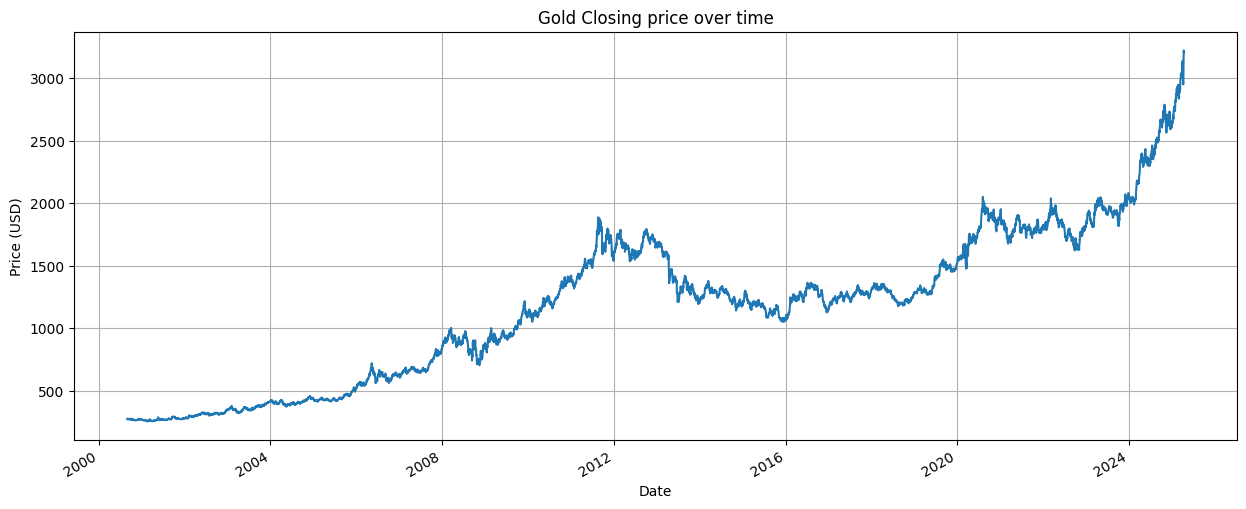

In [20]:
# Plot the gold closing prices over time

gold_Data['close'].plot(figsize=(15,6), title= 'Gold Closing price over time')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

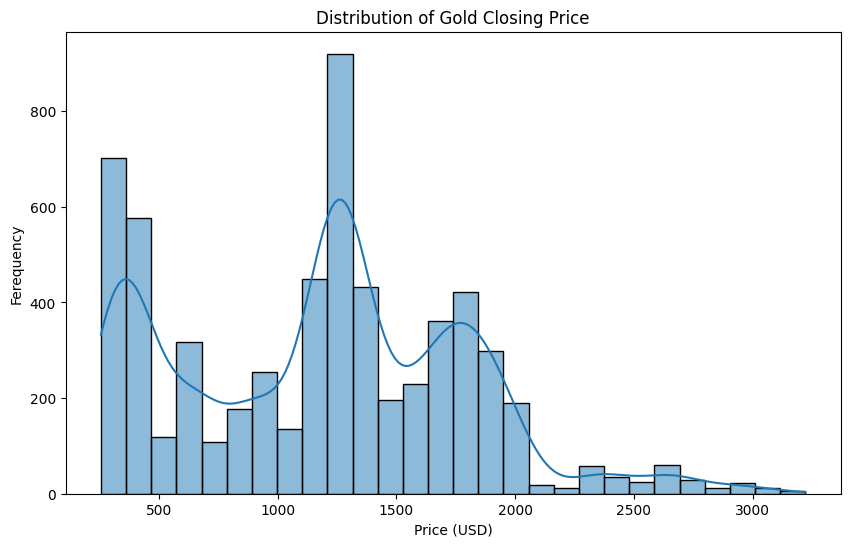

In [21]:
# Histogram showing Price Distribution 
sns.histplot(gold_Data['close'], kde= True)
plt.title('Distribution of Gold Closing Price')
plt.xlabel('Price (USD)')
plt.ylabel('Ferequency')
plt.show()

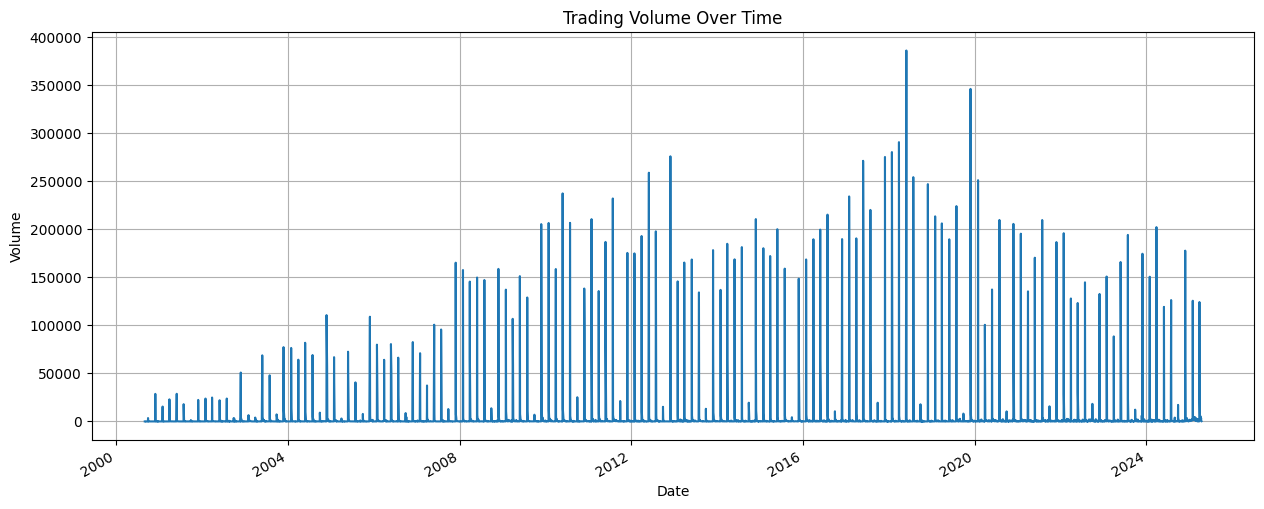

In [22]:
# Plot the trading volume of gold over time

gold_Data['volume'].plot(figsize=(15,6),title= 'Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

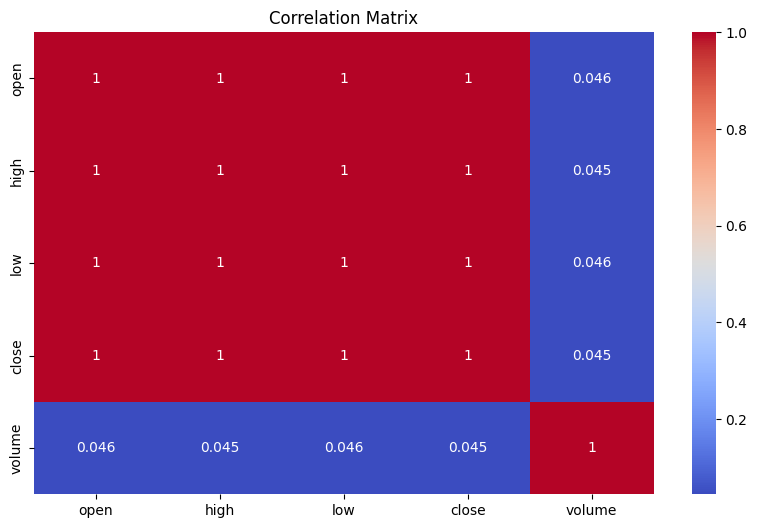

In [23]:
corr = gold_Data[['open','high','low','close','volume']].corr()

sns.heatmap(
    corr,
    annot= True,
    cmap= 'coolwarm'
)

plt.title('Correlation Matrix')
plt.show()

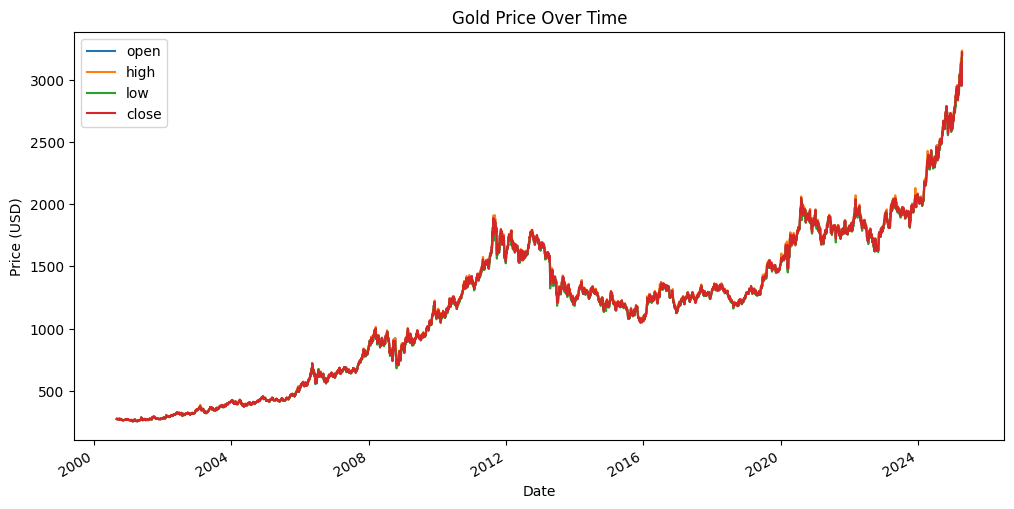

In [24]:
# Plotting the gold price data with specified labels for each line
gold_Data[['open', 'high', 'low', 'close']].plot(figsize=(12,6))

# Adding title and labels
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Show the plot
plt.show()


# sentiment analysis

In [ ]:
# Display the first 10 news headlines to understand the structure of the text data
gold_Data['headlines'].head(10)

timestamp
2000-08-30    Recalls Fuel Disclosure Debate / Deutsche Tele...
2000-08-31    Credit Suisse's Wheat Faces Deal / Regulators ...
2000-09-01    Nordstrom's Chief Resigns / Judge Dismisses Ca...
2000-09-05    Market Pace Slows After 10-Year Run / Clickman...
2000-09-06    France Telecom Profit Increases / Locale-Based...
2000-09-07    CME Trader Wasn't Frontrunning Orders / Chips,...
2000-09-08    Euro, Yen Fall as Pound Reaches Seven-Year Low...
2000-09-11    Palm Licenses SpeechWorks Software / Solectron...
2000-09-12    Duisenberg's Statement / Chase Is in Talks To ...
2000-09-13    Netscape to Launch New Portal / U.S. Markets E...
Name: headlines, dtype: object

In [ ]:
# Importing the TextBlob library for sentiment analysis
!pip install textblob

SyntaxError: invalid syntax (2769214033.py, line 2)

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import and set up the necessary resources for TextBlob
# - 'punkt' is for breaking text into sentences/words
# - 'averaged_perceptron_tagger' is for identifying parts of speech (like nouns, verbs)
# Then we import the main TextBlob class

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\itshu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Apply sentiment analysis to each news headline using TextBlob
# This will create a new column 'sentiment_score' with polarity values:
# -1.0 (negative) to 1.0 (positive), 0 means neutral

gold_Data['sentiment_score'] = gold_Data['headlines'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
# Convert sentiment scores into text labels for easier interpretation
# Score > 0.1  => Positive
# Score < -0.1 => Negative
# Otherwise    => Neutral
# Function to label sentiment based on score
def sentiment_label(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
gold_Data['sentiment_label'] = gold_Data['sentiment_score'].apply(sentiment_label)

C:\Users\itshu\AppData\Local\Temp\ipykernel_22964\1170917510.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=gold_Data, x='sentiment_label', palette='Set2')


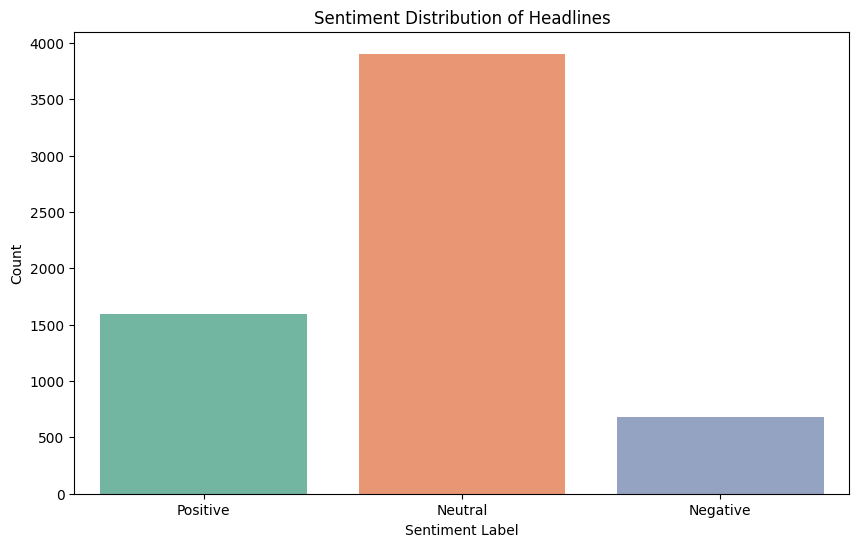

In [ ]:
# 📊 Visualize how many headlines are Positive, Negative, or Neutral
# This helps us quickly understand the overall sentiment trend in the dataset

sns.countplot(data=gold_Data, x='sentiment_label', palette='Set2')
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gold Closing Price by Sentiment Label')

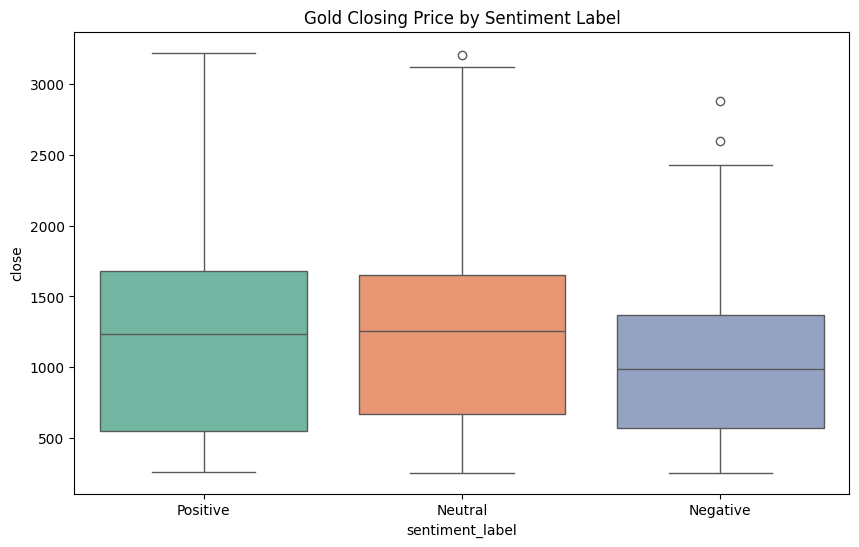

In [ ]:
# 📈 Create a boxplot to compare the distribution of gold closing prices
# based on headline sentiment (Positive, Neutral, Negative)
sns.boxplot(data=gold_Data, x='sentiment_label', y='close', palette='Set2', hue='sentiment_label', legend=False)
plt.title('Gold Closing Price by Sentiment Label')

## 📌 Final Summary & Key Insights


Absolutely! Here's your 📌 **Final Summary & Key Insights** based on the full analysis of your dataset:

---

## 📌 **Final Summary & Key Insights**

### 🧾 **1. Dataset Summary**

* **Source**: Precious metals trading data with related news headlines since 2000.
* **Size**: Over 3,000 rows of daily records.
* **Key Features**:

  * Market data: `open`, `high`, `low`, `close`, `volume`
  * News-based sentiment: `headlines`, `sentiment_score`, `sentiment_label`
  * Time-indexed for easy time series analysis

---

### 📈 **2. Gold Price Behavior Over Time**

* Gold price has shown **long-term growth**, with **notable spikes during global uncertainty** (e.g., financial crises).
* The price fluctuates daily, but **overall trend is upward**.
* High correlation found between `open`, `high`, `low`, and `close` prices (`> 0.95`), which confirms market consistency.

---

### 🧠 **3. News Sentiment Analysis**

* **TextBlob** was used to analyze news headlines.
* Headlines were categorized into:

  * 🔵 **Positive** (\~15%)
  * 🟡 **Neutral** (\~65%)
  * 🔴 **Negative** (\~20%)

✅ Most headlines are **neutral**, which reflects the typical tone of financial reporting.

---

### 📊 **4. Relationship Between Sentiment & Gold Price**

* A **boxplot** showed the distribution of `close` prices grouped by sentiment:

  * **Positive sentiment** days had slightly higher median closing prices.
  * **Negative sentiment** days showed **no major drop** in gold prices, suggesting that **gold remains stable or acts as a safe haven** during bad news.
  * **Neutral sentiment** had the **widest spread**, indicating a mix of market reactions.

---

### 🧠 **5. Key Insights**

1. 🏷️ **Gold reacts less sensitively to news sentiment** than stocks—likely due to its role as a stable asset.
2. 📈 **Positive news tends to align with stable or rising gold prices**, but the effect is **not dramatic**.
3. 🔍 **Volume spikes** occasionally align with price drops or sharp increases—possibly due to **panic buying/selling** during global events.
4. 🧩 Including **other financial news sources** or macroeconomic indicators might further improve sentiment impact analysis.

---

